In [1]:
import pandas as pd 
from google.colab import drive
import matplotlib.pyplot as plt 
from sklearn.metrics import roc_curve, auc
import seaborn as sns 
import os

drive.mount('/content/drive/')
os.chdir('/content/drive/MyDrive/thesis/predictions/')

Mounted at /content/drive/


In [9]:
df = pd.read_csv('predictions.csv')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


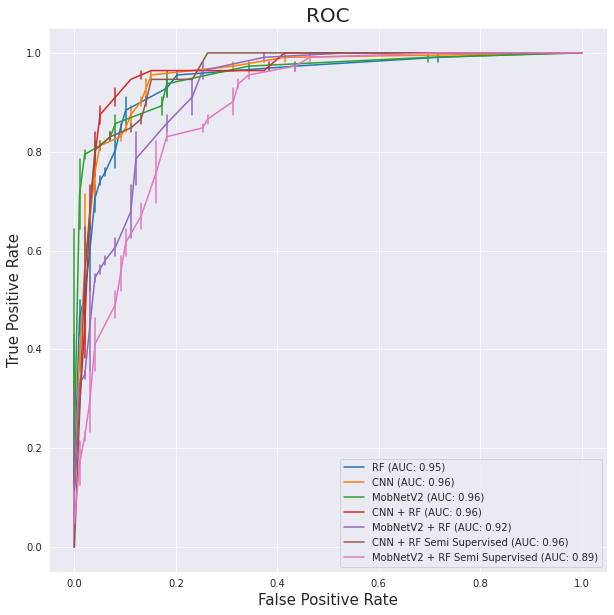

In [4]:
plt.figure(figsize=(10,10))
plt.title("ROC", fontsize=20)

sns.set_style("darkgrid")
# RF
fpr, tpr, thresholds = roc_curve(df['test_labels'], df['pred_prob_rf'])
a = round(auc(fpr, tpr),2)
sns.lineplot(x=fpr, y=tpr, label="RF (AUC: {})".format(a), err_style='bars')

# CNN
fpr, tpr, thresholds = roc_curve(df['test_labels'], df['pred_probs_cnnkf'])
a = round(auc(fpr, tpr),2)
sns.lineplot(x=fpr, y=tpr, label="CNN (AUC: {})".format(a), err_style='bars')

# MobNetV2
fpr, tpr, thresholds = roc_curve(df['test_labels'], df['pred_probs_mobnet'])
a = round(auc(fpr, tpr),2)
sns.lineplot(x=fpr, y=tpr, label="MobNetV2 (AUC: {})".format(a), err_style='bars')

# CNN + Random Forest
fpr, tpr, thresholds = roc_curve(df['test_labels'], df['pred_probs_rfcnnkf3'])
a = round(auc(fpr, tpr),2)
sns.lineplot(x=fpr, y=tpr, label="CNN + RF (AUC: {})".format(a), err_style='bars')

# MobNetV2 + Random Forest
fpr, tpr, thresholds = roc_curve(df['test_labels'], df['pred_probs_rfmobnet'])
a = round(auc(fpr, tpr),2)
sns.lineplot(x=fpr, y=tpr, label="MobNetV2 + RF (AUC: {})".format(a), err_style='bars')

# CNN + Random Forest Self_Supervised
fpr, tpr, thresholds = roc_curve(df['test_labels'], df['pred_probs_rfcnnkf3_ss'])
a = round(auc(fpr, tpr),2)
sns.lineplot(fpr, tpr, label="CNN + RF Semi Supervised (AUC: {})".format(a), err_style='bars')

# MobNetV2 + Random Forest Self_Supervised
fpr, tpr, thresholds = roc_curve(df['test_labels'], df['pred_probs_rfmobnet_ss'])
a = round(auc(fpr, tpr),2)
sns.lineplot(x=fpr, y=tpr, label="MobNetV2 + RF Semi Supervised (AUC: {})".format(a), err_style='bars')
plt.legend()

plt.ylabel("True Positive Rate", fontsize=15)
plt.xlabel("False Positive Rate", fontsize=15)
plt.savefig("../code/figures/ROC_RF_CNN_MobNetV2_ss.png")

# DINO results 

In [12]:
import glob
import os
os.listdir(os.getcwd())

['performance_knn_on_training_and_pseudolabeled.csv',
 'performance_knn_ontrainingset.csv',
 'performance_linear_ontrainingset.csv',
 'performance_linear_on_training_and_pseudolabeled.csv',
 'predictions.csv']

In [13]:
lin_ontrain = pd.read_csv('performance_linear_ontrainingset.csv')
lin_all = pd.read_csv('performance_linear_on_training_and_pseudolabeled.csv')
knn_ontrain = pd.read_csv('performance_knn_ontrainingset.csv')
knn_all = pd.read_csv('performance_knn_on_training_and_pseudolabeled.csv')

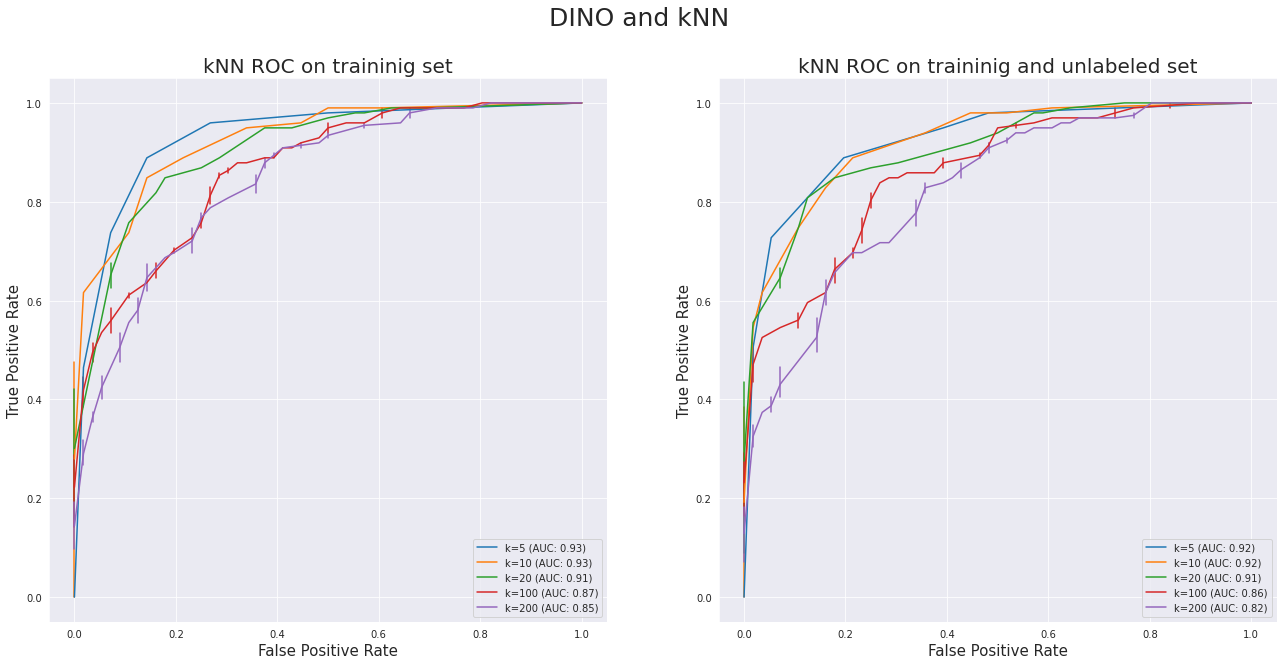

In [ ]:
plt.figure(figsize=(22,10))
plt.suptitle("DINO and kNN ", fontsize=25)

plt.subplot(121)
plt.title("kNN ROC on training set", fontsize=20)

sns.set_style("darkgrid")
# K=5
fpr, tpr, thresholds = roc_curve(knn_ontrain['test_labels'], knn_ontrain['5'])
a = round(auc(fpr, tpr),2)
sns.lineplot(x=fpr, y=tpr, label="k=5 (AUC: {})".format(a), err_style='bars')

# K=10
fpr, tpr, thresholds = roc_curve(knn_ontrain['test_labels'], knn_ontrain['10'])
a = round(auc(fpr, tpr),2)
sns.lineplot(x=fpr, y=tpr, label="k=10 (AUC: {})".format(a), err_style='bars')

# K=20
fpr, tpr, thresholds = roc_curve(knn_ontrain['test_labels'], knn_ontrain['20'])
a = round(auc(fpr, tpr),2)
sns.lineplot(x=fpr, y=tpr, label="k=20 (AUC: {})".format(a), err_style='bars')

# K=100
fpr, tpr, thresholds = roc_curve(knn_ontrain['test_labels'], knn_ontrain['100'])
a = round(auc(fpr, tpr),2)
sns.lineplot(x=fpr, y=tpr, label="k=100 (AUC: {})".format(a), err_style='bars')

# K=200
fpr, tpr, thresholds = roc_curve(knn_ontrain['test_labels'], knn_ontrain['200'])
a = round(auc(fpr, tpr),2)
sns.lineplot(x=fpr, y=tpr, label="k=200 (AUC: {})".format(a), err_style='bars')
plt.ylabel("True Positive Rate", fontsize=15)
plt.xlabel("False Positive Rate", fontsize=15)

plt.subplot(122)
plt.title("kNN ROC on training and unlabeled set", fontsize=20)

sns.set_style("darkgrid")
# K=5
fpr, tpr, thresholds = roc_curve(knn_all['test_labels'], knn_all['5'])
a = round(auc(fpr, tpr),2)
sns.lineplot(x=fpr, y=tpr, label="k=5 (AUC: {})".format(a), err_style='bars')

# K=10
fpr, tpr, thresholds = roc_curve(knn_all['test_labels'], knn_all['10'])
a = round(auc(fpr, tpr),2)
sns.lineplot(x=fpr, y=tpr, label="k=10 (AUC: {})".format(a), err_style='bars')

# K=20
fpr, tpr, thresholds = roc_curve(knn_all['test_labels'], knn_all['20'])
a = round(auc(fpr, tpr),2)
sns.lineplot(x=fpr, y=tpr, label="k=20 (AUC: {})".format(a), err_style='bars')

# K=100
fpr, tpr, thresholds = roc_curve(knn_all['test_labels'], knn_all['100'])
a = round(auc(fpr, tpr),2)
sns.lineplot(x=fpr, y=tpr, label="k=100 (AUC: {})".format(a), err_style='bars')

# K=200
fpr, tpr, thresholds = roc_curve(knn_all['test_labels'], knn_all['200'])
a = round(auc(fpr, tpr),2)
sns.lineplot(x=fpr, y=tpr, label="k=200 (AUC: {})".format(a), err_style='bars')

plt.ylabel("True Positive Rate", fontsize=15)
plt.xlabel("False Positive Rate", fontsize=15)

plt.savefig("../code/figures/DINO_KNN.png")

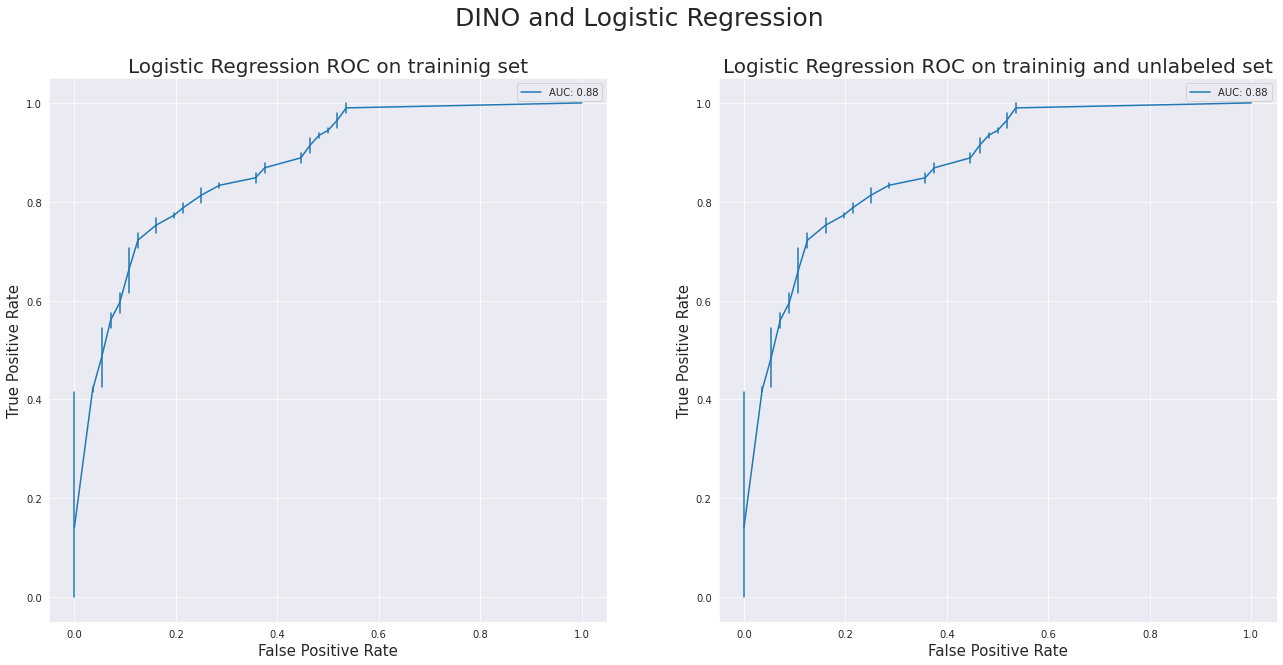

In [ ]:
plt.figure(figsize=(22,10))
plt.suptitle("DINO and Logistic Regression ", fontsize=25)

plt.subplot(121)
plt.title("Logistic Regression ROC on training set", fontsize=20)

sns.set_style("darkgrid")
fpr, tpr, thresholds = roc_curve(lin_ontrain['test_labels'], lin_ontrain['preds'])
a = round(auc(fpr, tpr),2)
sns.lineplot(x=fpr, y=tpr, label="AUC: {}".format(a), err_style='bars')
plt.ylabel("True Positive Rate", fontsize=15)
plt.xlabel("False Positive Rate", fontsize=15)

plt.subplot(122)
plt.title("Logistic Regression ROC on training and unlabeled set", fontsize=20)

sns.set_style("darkgrid")
fpr, tpr, thresholds = roc_curve(lin_all['test_labels'], lin_all['preds'])
a = round(auc(fpr, tpr),2)
sns.lineplot(x=fpr, y=tpr, label="AUC: {}".format(a), err_style='bars')

plt.ylabel("True Positive Rate", fontsize=15)
plt.xlabel("False Positive Rate", fontsize=15)
plt.savefig("../code/figures/DINO_lin.png")

# ROC plot grid

In [5]:
def roc_grid_plot(df, title_dict):
  # arrange grid
  nplots = len(df.columns.drop('test_labels'))
  if nplots%3==0:
    rows = nplots//3
    cols = 3
  else:
    rows = nplots//3 + 1
    cols = 3
  i = 1
  colors = sns.color_palette("hls", nplots)

  # plot subplots
  for c in df.columns.drop('test_labels'):
    plt.subplot(rows, cols, i)
    sns.set_style("darkgrid")
    fpr, tpr, thresholds = roc_curve(df['test_labels'], df[c])
    a = round(auc(fpr, tpr),2)
    sns.lineplot(x=fpr, y=tpr, label="{} (AUC: {})".format(title_dict[c], a), err_style='bars', color=colors[i-1])
    plt.legend(loc='lower right')
    plt.title("{} ROC".format(title_dict[c]), fontsize=10)
    plt.ylabel("True Positive Rate")#, fontsize=15)
    plt.xlabel("False Positive Rate")#, fontsize=15)
    i+=1


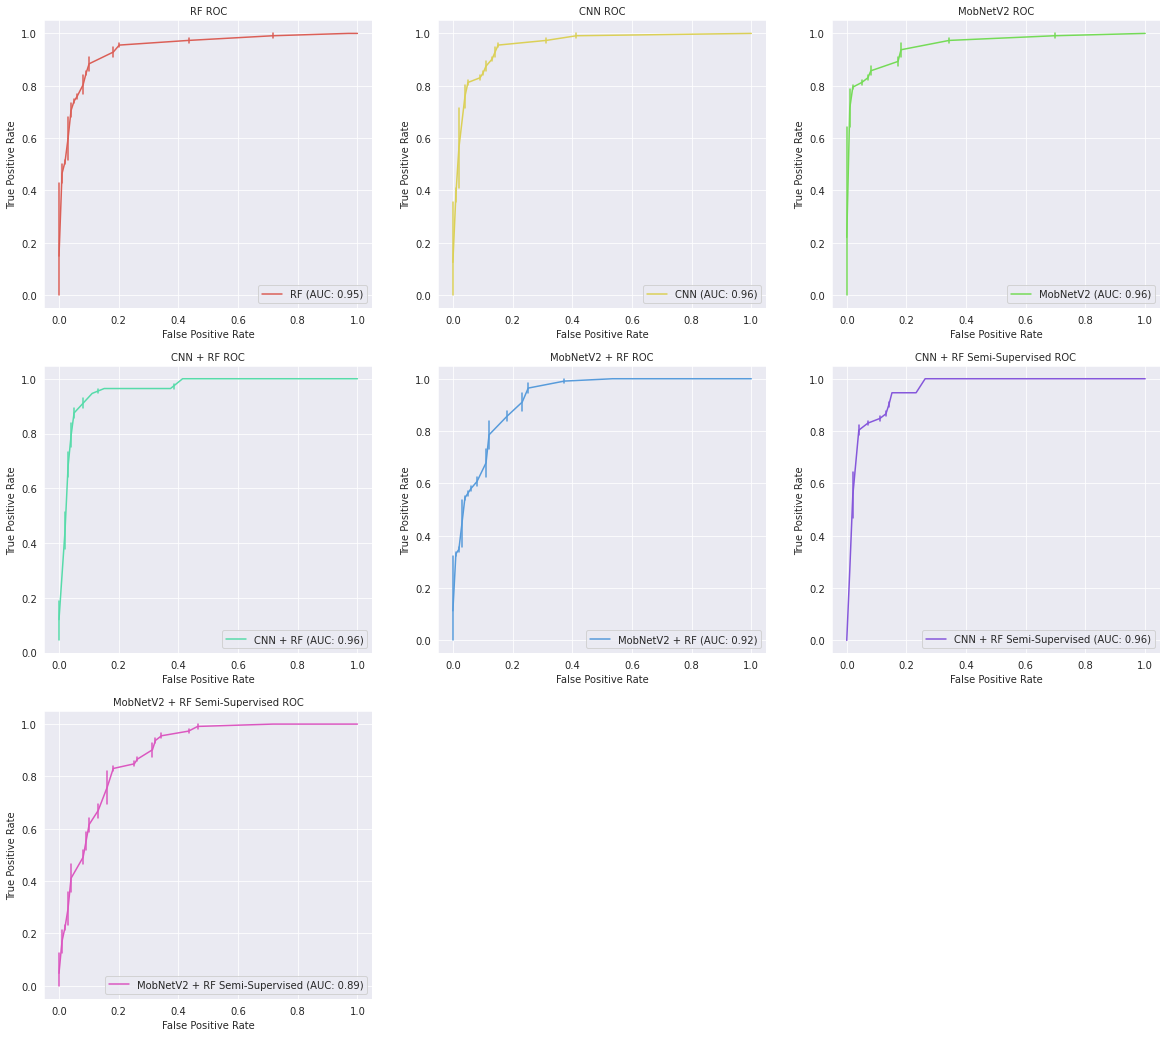

In [11]:
plt.figure(figsize=(20,18))
titles = {'pred_prob_rf': 'RF', 
          'pred_probs_cnnkf': 'CNN',
          'pred_probs_mobnet': 'MobNetV2',
          'pred_probs_rfcnnkf3': 'CNN + RF', 
          'pred_probs_rfmobnet': 'MobNetV2 + RF', 
          'pred_probs_rfcnnkf3_ss': 'CNN + RF Semi-Supervised', 
          'pred_probs_rfmobnet_ss': 'MobNetV2 + RF Semi-Supervised'}
roc_grid_plot(df, titles)
plt.savefig("../code/figures/ROC_RF_CNN_MobNetV2_ss_GRID.png")

In [ ]:
knn_ontrain.columns

Index(['5', '10', '20', '100', '200', 'test_labels'], dtype='object')

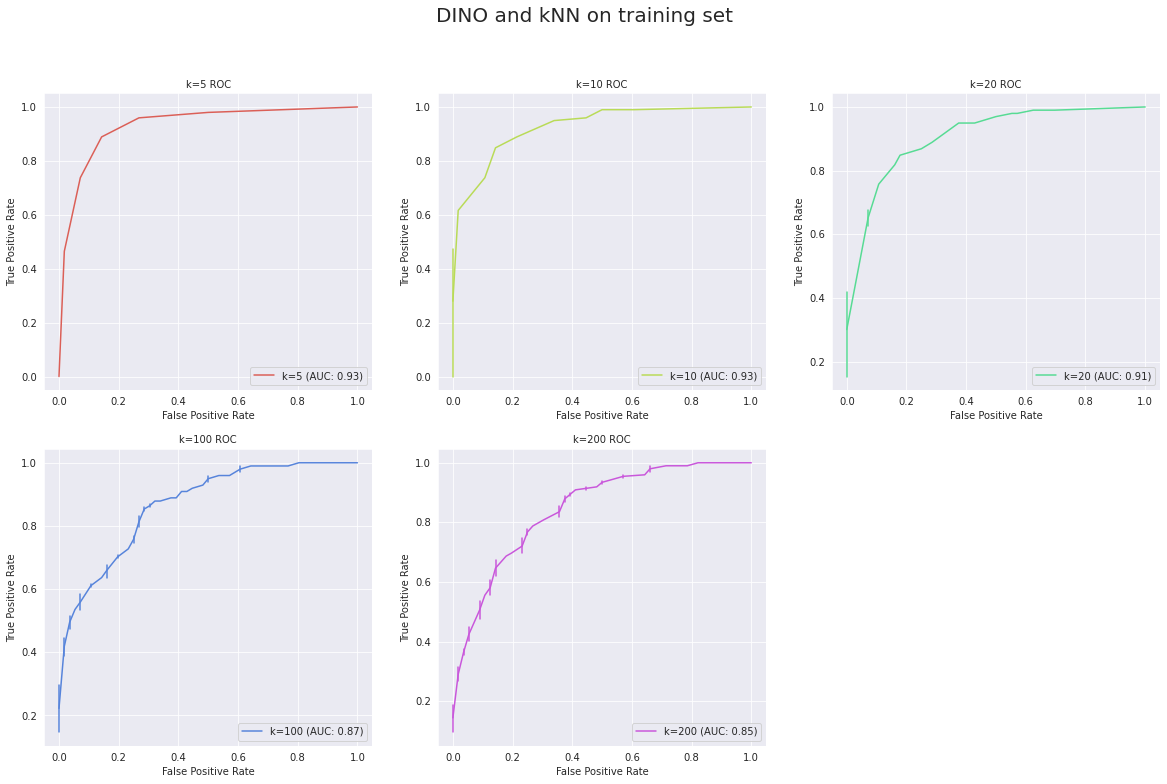

In [14]:
plt.figure(figsize=(20,12))
plt.suptitle('DINO and kNN on training set', fontsize=20)
titles = {'5': 'k=5', 
          '10': 'k=10',
          '20': 'k=20',
          '100': 'k=100', 
          '200': 'k=200'}
roc_grid_plot(knn_ontrain, titles)
plt.savefig("../code/figures/DINO_kNN_ontrain_GRID.png")

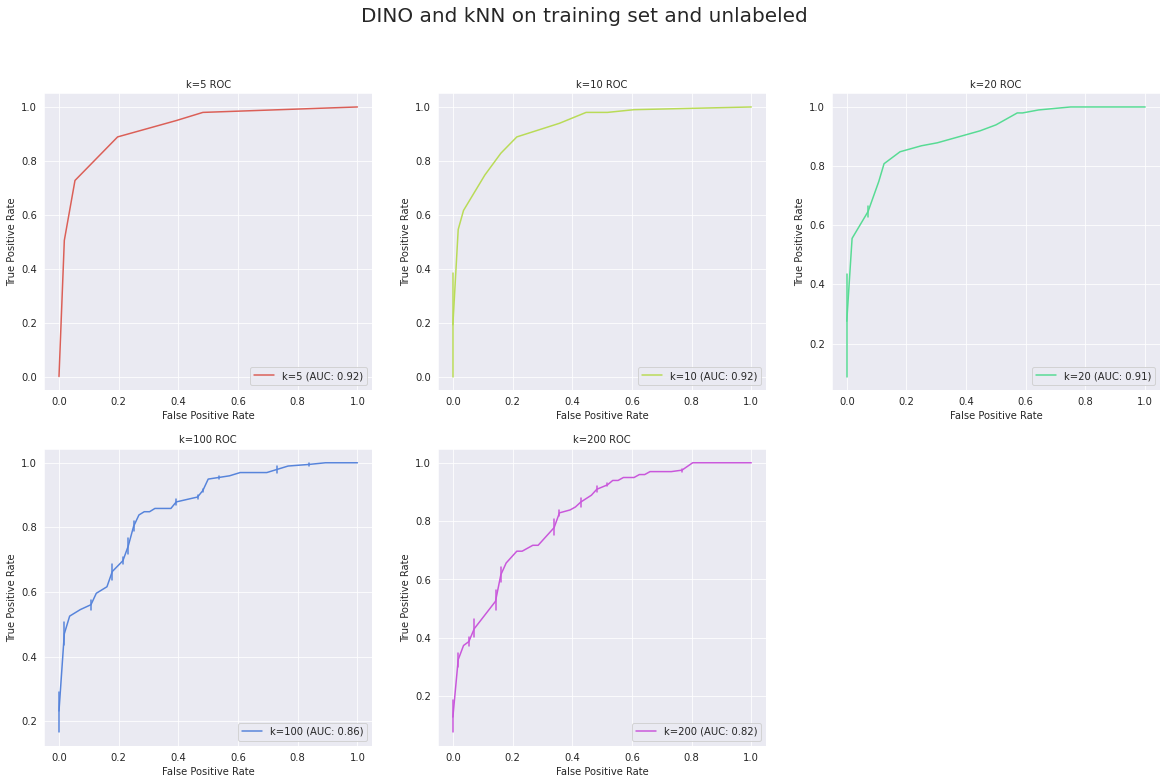

In [15]:
plt.figure(figsize=(20,12))
plt.suptitle('DINO and kNN on training set and unlabeled', fontsize=20)
titles = {'5': 'k=5', 
          '10': 'k=10',
          '20': 'k=20',
          '100': 'k=100', 
          '200': 'k=200'}
roc_grid_plot(knn_all, titles)
plt.savefig("../code/figures/DINO_kNN_alldata_GRID.png")